<a href="https://colab.research.google.com/github/Eng-Samyle/Alura_TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas necessárias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Extração

In [3]:
dados = 'https://raw.githubusercontent.com/Eng-Samyle/Alura_TelecomX/refs/heads/main/TelecomX_Data.json'
dados = pd.read_json(dados)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
def normalizando(dataframe, nome_coluna):
  dataframe = pd.concat([dataframe, pd.json_normalize(dataframe[nome_coluna])], axis=1)
  dataframe.drop(nome_coluna, axis=1, inplace=True)
  return dataframe

In [5]:
dados = normalizando(dados,'customer')
dados = normalizando(dados,'phone')
dados = normalizando(dados,'internet')
dados = normalizando(dados,'account')
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
dados['customerID'] = dados['customerID'].astype(str)
dados['customerID'].nunique()

7267

In [7]:
dados['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [8]:
dados['Churn'] = dados['Churn'].str.strip().str.lower()
valores_nao_quero = ['']
valores= ~dados['Churn'].isin(valores_nao_quero)
dados['Churn'] = dados['Churn'][valores]
dados.dropna(subset=['Churn'], inplace=True)

###Dividindo o DataFrame em subDataFrame para as diferentes análises

Dados das caracteristicas dos clientes e tratamento desses dados

In [9]:
dados_carc_clintes = dados[['Churn','MultipleLines','gender','SeniorCitizen','Partner','Dependents']]
dados_carc_clintes

,Churn,MultipleLines,gender,SeniorCitizen,Partner,Dependents
0,no,No,Female,0,Yes,Yes
1,no,Yes,Male,0,No,No
2,yes,No,Male,0,No,No
3,yes,No,Male,1,Yes,No
4,yes,No,Female,1,Yes,No
...,...,...,...,...,...,...
7262,no,No,Female,0,No,No
7263,yes,Yes,Male,0,Yes,No
7264,no,No,Male,0,No,No
7265,no,No,Male,0,Yes,Yes


In [10]:
dados_carc_clintes['Churn'] = dados_carc_clintes['Churn'].str.strip().str.lower()
valores_nao_quero = [' ', 'no']
valores= ~dados_carc_clintes['Churn'].isin(valores_nao_quero)
nao_possui_servico = dados_carc_clintes[valores]

<ipython-input-10-1539224975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_carc_clintes['Churn'] = dados_carc_clintes['Churn'].str.strip().str.lower()


In [11]:
nao_possui_servico

,Churn,MultipleLines,gender,SeniorCitizen,Partner,Dependents
2,yes,No,Male,0,No,No
3,yes,No,Male,1,Yes,No
4,yes,No,Female,1,Yes,No
18,yes,No,Male,1,No,No
19,yes,No phone service,Male,1,No,No
...,...,...,...,...,...,...
7243,yes,No,Male,1,No,No
7246,yes,Yes,Male,1,No,No
7260,yes,No,Female,0,No,No
7261,yes,No,Female,0,No,No


In [12]:
for coluna in dados_carc_clintes.columns:
  print(f'{coluna}: {dados_carc_clintes[coluna].unique()}')

Churn: ['no' 'yes']
MultipleLines: ['No' 'Yes' 'No phone service']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']


Dados dos gastos por clientes

In [13]:
dados['Conta_diaria']=dados['Charges.Monthly']/30

In [14]:
dados_est = dados[['Churn','MultipleLines','tenure','Charges.Monthly', 'Charges.Total', 'Conta_diaria']]
dados_est

,Churn,MultipleLines,tenure,Charges.Monthly,Charges.Total,Conta_diaria
0,no,No,9,65.60,593.3,2.186667
1,no,Yes,9,59.90,542.4,1.996667
2,yes,No,4,73.90,280.85,2.463333
3,yes,No,13,98.00,1237.85,3.266667
4,yes,No,3,83.90,267.4,2.796667
...,...,...,...,...,...,...
7262,no,No,13,55.15,742.9,1.838333
7263,yes,Yes,22,85.10,1873.7,2.836667
7264,no,No,2,50.30,92.75,1.676667
7265,no,No,67,67.85,4627.65,2.261667


In [15]:
dados_est['Charges.Total'] = dados_est['Charges.Total'].replace('[^0-9.\-\']', np.nan, regex=True)
dados_est['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')

<ipython-input-15-924133563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_est['Charges.Total'] = dados_est['Charges.Total'].replace('[^0-9.\-\']', np.nan, regex=True)
<ipython-input-15-924133563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_est['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')


In [16]:
def mudando_tipy(dataframe, nome_coluna):
  dataframe[nome_coluna] = dataframe[nome_coluna].astype(np.float64)

In [17]:
dados_est.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7043 non-null   object 
 1   MultipleLines    7043 non-null   object 
 2   tenure           7043 non-null   int64  
 3   Charges.Monthly  7043 non-null   float64
 4   Charges.Total    7032 non-null   float64
 5   Conta_diaria     7043 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 385.2+ KB


In [18]:
mudando_tipy(dados_est, 'Charges.Monthly')
mudando_tipy(dados_est, 'Charges.Total')
mudando_tipy(dados_est, 'Conta_diaria')

<ipython-input-16-1854277381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[nome_coluna] = dataframe[nome_coluna].astype(np.float64)
<ipython-input-16-1854277381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[nome_coluna] = dataframe[nome_coluna].astype(np.float64)
<ipython-input-16-1854277381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

##📊 Carga e Análise (L - Load & Analysis)

In [19]:
dados_est

,Churn,MultipleLines,tenure,Charges.Monthly,Charges.Total,Conta_diaria
0,no,No,9,65.60,593.30,2.186667
1,no,Yes,9,59.90,542.40,1.996667
2,yes,No,4,73.90,280.85,2.463333
3,yes,No,13,98.00,1237.85,3.266667
4,yes,No,3,83.90,267.40,2.796667
...,...,...,...,...,...,...
7262,no,No,13,55.15,742.90,1.838333
7263,yes,Yes,22,85.10,1873.70,2.836667
7264,no,No,2,50.30,92.75,1.676667
7265,no,No,67,67.85,4627.65,2.261667


In [20]:
dados_est.describe().round(2)

,tenure,Charges.Monthly,Charges.Total,Conta_diaria
count,7043.00,7043.00,7032.00,7043.00
mean,32.37,64.76,2283.30,2.16
std,24.56,30.09,2266.77,1.00
min,0.00,18.25,18.80,0.61
25%,9.00,35.50,401.45,1.18
50%,29.00,70.35,1397.48,2.34
75%,55.00,89.85,3794.74,2.99
max,72.00,118.75,8684.80,3.96


In [66]:
colunas_para_crosstab =[
    'gender',
    'SeniorCitizen', # Usaremos a coluna rotulada para melhor visualização
    'Partner',
    'Dependents',
    'MultipleLines', 'tenure',
    'PaperlessBilling', 'Contract', 'PaymentMethod', 'PhoneService',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'
]

print("--- Tabelas de Contagem de Churn por Categoria ---")

for col in colunas_para_crosstab:
    print(f"\n--- Tabela: Churn vs {col} ---")
    # pd.crosstab(index=dataframe['coluna_da_linha'], columns=dataframe['coluna_da_coluna'])
    tabela_crosstab = pd.crosstab(index=dados[col], columns=dados['Churn'])

    # Opcional: Adicionar uma coluna de total de linha
    tabela_crosstab['Total'] = tabela_crosstab.sum(axis=1)

    # Opcional: Adicionar uma linha de total de coluna
    # tabela_crosstab.loc['Total'] = tabela_crosstab.sum()


    print(tabela_crosstab)
    print("\n" + "="*40 + "\n") # Separador para facilitar a leitura

--- Tabelas de Contagem de Churn por Categoria ---

--- Tabela: Churn vs gender ---
Churn     no  yes  Total
gender                  
Female  2549  939   3488
Male    2625  930   3555



--- Tabela: Churn vs SeniorCitizen ---
Churn            no   yes  Total
SeniorCitizen                   
0              4508  1393   5901
1               666   476   1142



--- Tabela: Churn vs Partner ---
Churn      no   yes  Total
Partner                   
No       2441  1200   3641
Yes      2733   669   3402



--- Tabela: Churn vs Dependents ---
Churn         no   yes  Total
Dependents                   
No          3390  1543   4933
Yes         1784   326   2110



--- Tabela: Churn vs MultipleLines ---
Churn               no  yes  Total
MultipleLines                     
No                2541  849   3390
No phone service   512  170    682
Yes               2121  850   2971



--- Tabela: Churn vs tenure ---
Churn    no  yes  Total
tenure                 
0        11    0     11
1       233  38

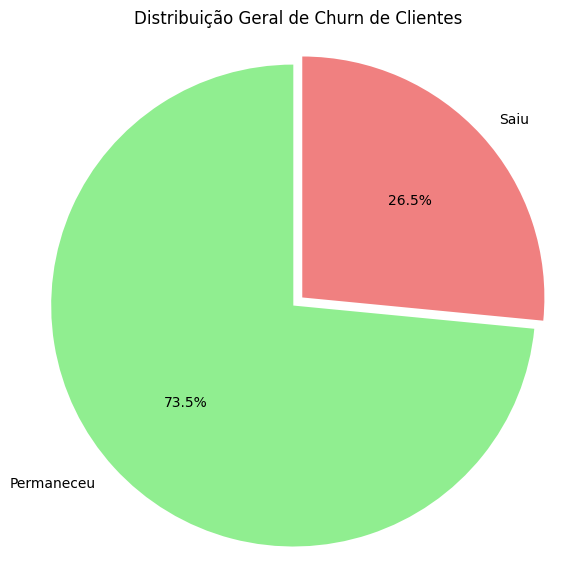

In [43]:
churn_counts = dados_carc_clintes['Churn'].value_counts()
plt.figure(figsize=(7, 7)) # Define o tamanho da figura (um quadrado)

# Definir rótulos para as fatias
# Podemos personalizar os rótulos para serem mais descritivos
labels = churn_counts.index.map(lambda x: 'Permaneceu' if x == 'Não' else 'Saiu')

# Definir as cores para 'no' e 'yes'
cores = {'Não': 'lightgreen', 'Sim': 'lightcoral'}
cores_ordenadas = [cores[label] for label in churn_counts.index] # Garante a ordem correta das cores

# plt.pie() espera os valores numéricos e os rótulos
plt.pie(churn_counts.values,
        labels=labels,
        autopct='%1.1f%%',   # Formato do percentual (uma casa decimal)
        startangle=90,       # Começa a primeira fatia do topo
        colors=cores_ordenadas,
        explode=[0.05 if label == 'Sim' else 0 for label in churn_counts.index] # Opcional: explode 'yes'
       )

plt.title('Distribuição Geral de Churn de Clientes')
plt.axis('equal') # Garante que o gráfico de pizza seja um círculo perfeito
plt.show()


In [22]:
mapeamento_churn = {'no': 'Não', 'yes': 'Sim'}
dados_carc_clintes['Churn'] = dados_carc_clintes['Churn'].map(mapeamento_churn)

<ipython-input-22-1936161398>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_carc_clintes['Churn'] = dados_carc_clintes['Churn'].map(mapeamento_churn)


In [23]:
mapeamento_dependents = {'No': 'Não', 'Yes': 'Sim'}
dados_carc_clintes['Dependents'] = dados_carc_clintes['Dependents'].map(mapeamento_dependents)

<ipython-input-23-1376544657>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_carc_clintes['Dependents'] = dados_carc_clintes['Dependents'].map(mapeamento_dependents)


In [24]:
mapeamento_partner = {'No': 'Não', 'Yes': 'Sim'}
dados_carc_clintes['Partner'] = dados_carc_clintes['Partner'].map(mapeamento_partner)

<ipython-input-24-467890519>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_carc_clintes['Partner'] = dados_carc_clintes['Partner'].map(mapeamento_partner)


In [25]:
dados_carc_clintes['Churn'].unique()

array(['Não', 'Sim'], dtype=object)

In [26]:
mapeamento_genero = {'Female': 'Feminino', 'Male': 'Masculino'}
dados_carc_clintes['gender'] = dados_carc_clintes['gender'].map(mapeamento_genero)

<ipython-input-26-3214299096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_carc_clintes['gender'] = dados_carc_clintes['gender'].map(mapeamento_genero)


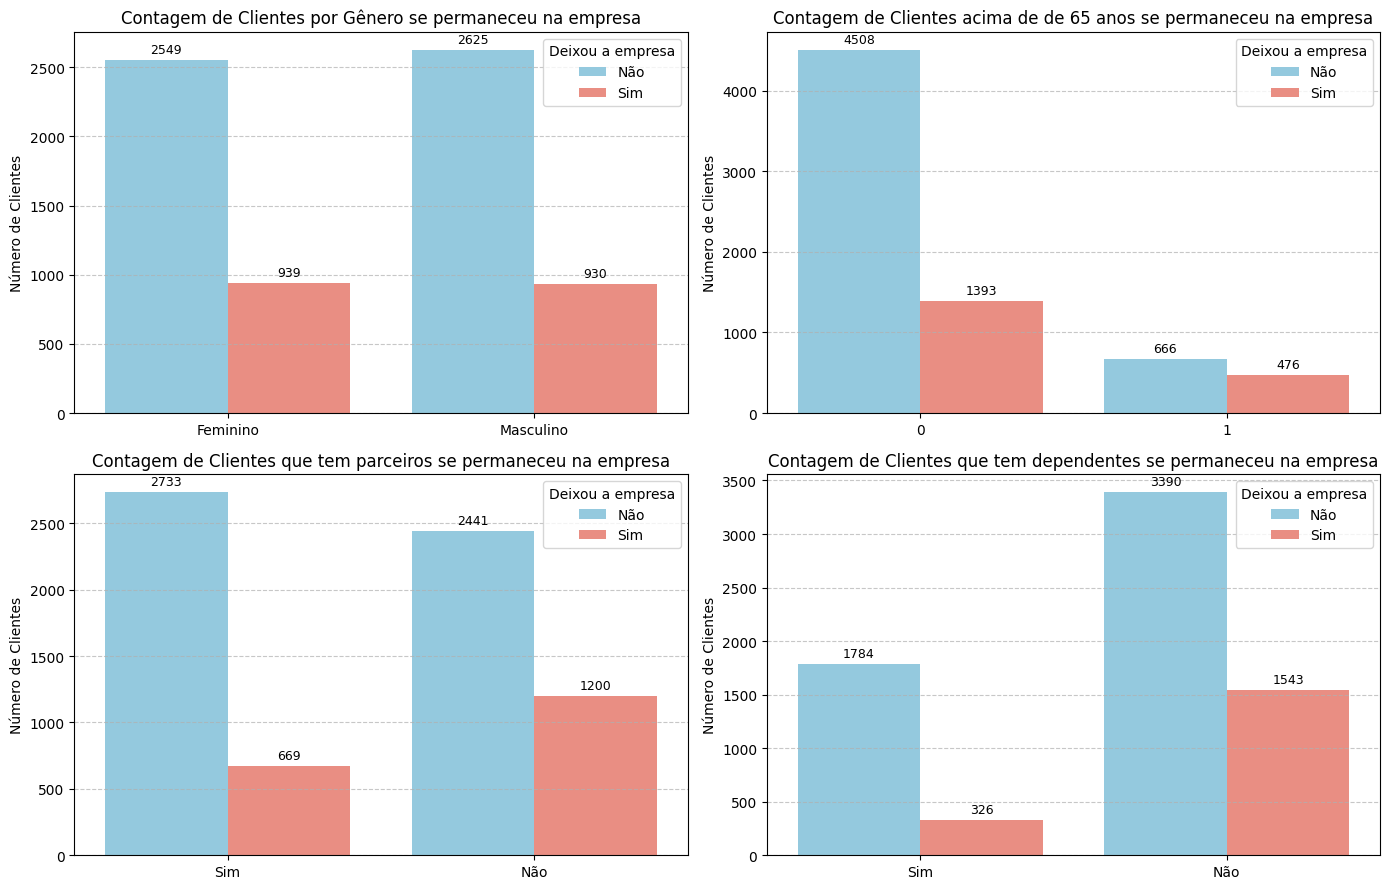

In [42]:
colunas_para_subplot = ['gender','SeniorCitizen','Partner', 'Dependents']

# Definir o número de linhas e colunas para os subplots
# Geralmente, para 2 gráficos, 1 linha e 2 colunas, ou 2 linhas e 1 coluna funciona bem.
# Vamos usar 1 linha e 2 colunas para que fiquem lado a lado.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9)) # 1 linha, 2 colunas, tamanho da figura

# Achatando o array de eixos para facilitar a iteração se tiver mais de 1 linha
axes = axes.flatten()

# Iterar sobre as colunas e plotar em cada subplot
for i, col in enumerate(colunas_para_subplot):
    # Usar sns.countplot diretamente no eixo específico (axes[i])
    sns.countplot(data=dados_carc_clintes, x=col, hue='Churn', palette={'Sim': 'salmon', 'Não': 'skyblue'}, ax=axes[i])

    axes[0].set_title('Contagem de Clientes por Gênero se permaneceu na empresa')
    axes[1].set_title('Contagem de Clientes acima de de 65 anos se permaneceu na empresa')
    axes[2].set_title('Contagem de Clientes que tem parceiros se permaneceu na empresa')
    axes[3].set_title('Contagem de Clientes que tem dependentes se permaneceu na empresa')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Número de Clientes')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Adicionar os valores acima das barras para cada subplot
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

    axes[i].legend(title='Deixou a empresa', loc='upper right') # Adicionar legenda em cada subplot

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()
